# Construyendo Nuestra Primera CNN

**Objetivo:** Aplicar los conceptos teóricos de la primera parte de este cursillo para construir y entrenar una Red Neuronal Convolucional (CNN) simple. Compararemos directamente sus resultados con los de las redes densas de la Sesión 1 para el problema de clasificación de CIFAR-10.

### 1. Importación de Librerías

Comenzamos importando las librerías necesarias. Además de las que ya usamos, ahora importaremos las capas específicas de las CNNs: `Conv2D` y `MaxPooling2D`.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.15.0


### 2. Carga y Preprocesamiento de Datos

Este paso es casi idéntico al de la Sesión 1. Cargamos CIFAR-10, definimos los nombres de las clases, normalizamos las imágenes y aplicamos codificación one-hot a las etiquetas. 

**La diferencia crucial:** ¡NO vamos a aplanar las imágenes! Las capas convolucionales necesitan la información espacial, por lo que la entrada al modelo mantendrá su forma original de `(32, 32, 3)`.

In [2]:
# Cargar los datos
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Definir los nombres de las clases
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Normalización de imágenes
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Codificación One-Hot para las etiquetas
num_classes = 10
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

print("Forma de los datos de entrenamiento (imágenes):", x_train.shape)

Forma de los datos de entrenamiento (imágenes): (50000, 32, 32, 3)


### 3. Construcción del Modelo CNN

Ahora viene la parte emocionante. Construiremos una arquitectura de CNN simple pero efectiva. Seguiremos el patrón clásico:

1.  **Bloque Convolucional 1:** Una capa `Conv2D` para detectar 32 tipos de características, seguida de una capa `MaxPooling2D` para reducir el tamaño.
2.  **Bloque Convolucional 2:** Otra capa `Conv2D` para aprender características más complejas (64 filtros), seguida de otro `MaxPooling2D`.
3.  **Bloque de Clasificación:** Aplanamos (`Flatten`) la salida del último bloque y la pasamos a una capa `Dense` para la clasificación final.

In [3]:
model_cnn = Sequential([
    # --- Bloque de Extracción de Características ---
    
    # Capa Convolucional 1: 
    # 32 filtros (detectores de características) de tamaño 3x3.
    # 'padding="same"' asegura que la salida tenga el mismo ancho y alto que la entrada.
    # 'activation="relu"' es la función de activación estándar.
    # 'input_shape' solo se especifica en la primera capa.
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)), # Reduce a la mitad el tamaño del mapa de características (de 32x32 a 16x16).
    
    # Capa Convolucional 2:
    # Aumentamos el número de filtros a 64 para aprender patrones más complejos.
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)), # Reduce de nuevo a la mitad (de 16x16 a 8x8).
    
    # --- Bloque de Clasificación ---
    
    # Aplanamos los mapas de características 2D a un solo vector 1D.
    Flatten(),
    
    # Una capa densa para realizar la clasificación basada en las características extraídas.
    Dense(64, activation='relu'),
    
    # Capa de salida con 10 neuronas (una por clase) y activación softmax.
    Dense(num_classes, activation='softmax')
])

model_cnn.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 4096)              0         
                                                                 
 dense (Dense)               (None, 64)               

**Análisis del `summary`:** ¡Observa la diferencia! Aunque la red es más "profunda" en términos de capas, el número total de parámetros es mucho menor que en nuestro primer modelo denso (que tenía ~1.7M de parámetros). Esto se debe al uso de parámetros compartidos en los filtros convolucionales. ¡Menos parámetros, menos riesgo de sobreajuste!

### 4. Compilación y Entrenamiento del Modelo

In [4]:
model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\n--- Entrenando la CNN ---")
history_cnn = model_cnn.fit(x_train, y_train_cat,
                          epochs=20,
                          batch_size=64,
                          validation_data=(x_test, y_test_cat))



--- Entrenando la CNN ---
Epoch 1/20


782/782 [==============================] - 21s 24ms/step - loss: 1.4386 - accuracy: 0.4881 - val_loss: 1.2321 - val_accuracy: 0.5771
Epoch 2/20
782/782 [==============================] - 18s 23ms/step - loss: 1.0661 - accuracy: 0.6283 - val_loss: 1.0340 - val_accuracy: 0.6370
Epoch 3/20
782/782 [==============================] - 18s 23ms/step - loss: 0.9409 - accuracy: 0.6733 - val_loss: 0.9680 - val_accuracy: 0.6664
Epoch 4/20
782/782 [==============================] - 18s 24ms/step - loss: 0.8604 - accuracy: 0.7001 - val_loss: 0.9195 - val_accuracy: 0.6837
Epoch 5/20
782/782 [==============================] - 18s 23ms/step - loss: 0.7935 - accuracy: 0.7228 - val_loss: 0.8934 - val_accuracy: 0.6930
Epoch 6/20
782/782 [==============================] - 18s 23ms/step - loss: 0.7358 - accuracy: 0.7428 - val_loss: 0.9206 - val_accuracy: 0.6855
Epoch 7/20
782/782 [==============================] - 19s 24ms/step - loss: 0.6857 - accuracy: 0.7605 - va

### 5. Evaluación de Resultados

Ahora, la prueba de fuego. Grafiquemos las curvas de aprendizaje y comparemos la precisión final con la que obtuvimos en la Sesión 1.


--- Evaluando los Resultados de la CNN ---
313/313 - 1s - loss: 1.3942 - accuracy: 0.6889 - 916ms/epoch - 3ms/step

Precisión final en el conjunto de prueba: 68.89%


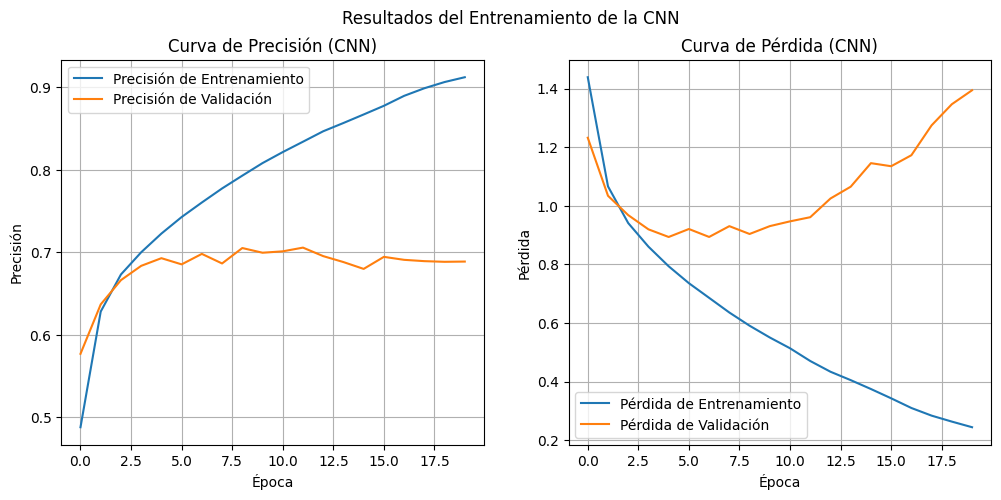

In [5]:
print("\n--- Evaluando los Resultados de la CNN ---")

# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model_cnn.evaluate(x_test, y_test_cat, verbose=2)
print(f'\nPrecisión final en el conjunto de prueba: {test_acc*100:.2f}%')

# Graficar las curvas de aprendizaje
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_cnn.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Curva de Precisión (CNN)')
plt.legend()
plt.grid(True)

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_cnn.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida (CNN)')
plt.legend()
plt.grid(True)

plt.suptitle("Resultados del Entrenamiento de la CNN")
plt.show()

In [6]:
model_cnn2 = Sequential([
    Conv2D(128, (2, 2), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (2, 2), padding='same', activation='relu'),
    MaxPooling2D((2, 2)), # Reduce de nuevo a la mitad (de 16x16 a 8x8).
    Flatten(),
    
    # Una capa densa para realizar la clasificación basada en las características extraídas.
    Dense(32, activation='relu'),
    
    # Capa de salida con 10 neuronas (una por clase) y activación softmax.
    Dense(num_classes, activation='softmax')
])

model_cnn2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       1664      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       65664     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 32)               

In [7]:
model_cnn2.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

print("\n--- Entrenando la CNN ---")
history_cnn2 = model_cnn2.fit(x_train, y_train_cat,
                          epochs=20,
                          batch_size=64,
                          validation_data=(x_test, y_test_cat))


--- Entrenando la CNN ---
Epoch 1/20
782/782 [==============================] - 31s 39ms/step - loss: 1.5866 - accuracy: 0.4244 - val_loss: 1.2631 - val_accuracy: 0.5514
Epoch 2/20
782/782 [==============================] - 30s 39ms/step - loss: 1.1771 - accuracy: 0.5808 - val_loss: 1.0898 - val_accuracy: 0.6192
Epoch 3/20
782/782 [==============================] - 30s 39ms/step - loss: 1.0455 - accuracy: 0.6307 - val_loss: 1.0413 - val_accuracy: 0.6328
Epoch 4/20
782/782 [==============================] - 31s 39ms/step - loss: 0.9570 - accuracy: 0.6638 - val_loss: 0.9585 - val_accuracy: 0.6653
Epoch 5/20
782/782 [==============================] - 32s 41ms/step - loss: 0.8921 - accuracy: 0.6861 - val_loss: 0.9445 - val_accuracy: 0.6727
Epoch 6/20
782/782 [==============================] - 32s 40ms/step - loss: 0.8314 - accuracy: 0.7084 - val_loss: 0.9210 - val_accuracy: 0.6781
Epoch 7/20
782/782 [==============================] - 32s 40ms/step - loss: 0.7873 - accuracy: 0.7263 - val_l


--- Evaluando los Resultados de la CNN ---
313/313 - 2s - loss: 1.0382 - accuracy: 0.6967 - 2s/epoch - 7ms/step

Precisión final en el conjunto de prueba: 69.67%


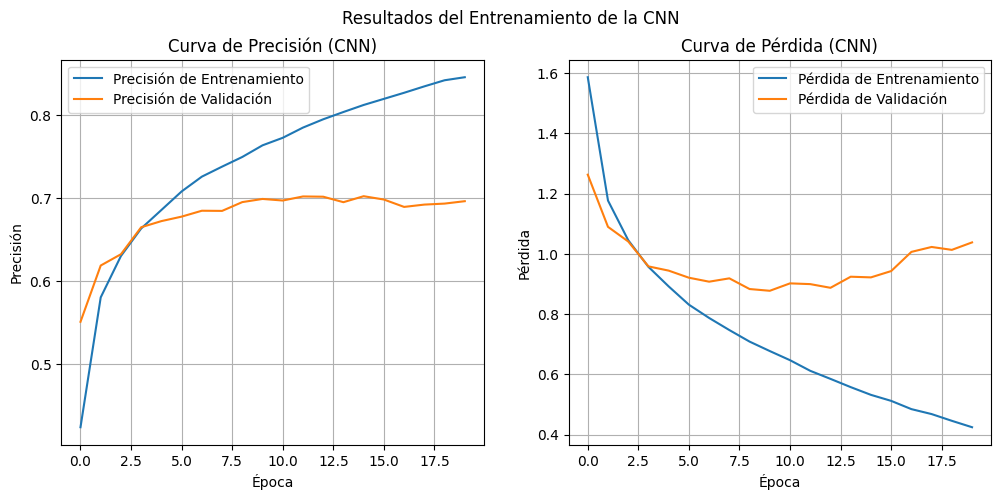

In [8]:
print("\n--- Evaluando los Resultados de la CNN ---")

# Evaluar el modelo con los datos de prueba
test_loss, test_acc = model_cnn2.evaluate(x_test, y_test_cat, verbose=2)
print(f'\nPrecisión final en el conjunto de prueba: {test_acc*100:.2f}%')

# Graficar las curvas de aprendizaje
plt.figure(figsize=(12, 5))

# Gráfico de precisión
plt.subplot(1, 2, 1)
plt.plot(history_cnn2.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history_cnn2.history['val_accuracy'], label='Precisión de Validación')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.title('Curva de Precisión (CNN)')
plt.legend()
plt.grid(True)

# Gráfico de pérdida
plt.subplot(1, 2, 2)
plt.plot(history_cnn2.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history_cnn2.history['val_loss'], label='Pérdida de Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Curva de Pérdida (CNN)')
plt.legend()
plt.grid(True)

plt.suptitle("Resultados del Entrenamiento de la CNN")
plt.show()

### Conclusión

¡El resultado habla por sí solo! La precisión de validación debería estar ahora en un rango mucho más respetable (> 65%), un salto gigantesco desde el ~48% que obtuvimos con las redes densas. 

**¿Por qué funcionó tan bien?**
1.  **Se preservó la estructura espacial:** Las capas `Conv2D` analizaron los patrones locales de las imágenes.
2.  **Se aprendió una jerarquía de características:** Las primeras capas aprendieron bordes y texturas, y las segundas los combinaron en patrones más complejos.
3.  **El modelo fue más eficiente:** Con muchos menos parámetros, el riesgo de sobreajuste se redujo, permitiendo que el modelo generalizara mucho mejor.

Hemos demostrado con éxito por qué las CNNs son la arquitectura de elección para problemas de visión por computadora. Con esta base, en la próxima sesión exploraremos arquitecturas más avanzadas como R-CNN y YOLO para ir más allá de la clasificación y entrar en el mundo de la **detección de objetos**.